In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import yfinance as yf
from tensorflow import keras
from keras import Sequential
from keras.layers import SimpleRNN, LSTM, Dense
from keras.optimizers import SGD

In [41]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [21]:
series = yf.Ticker("GC=F")
prices = series.history(start='2019-01-06', end='2024-07-12').Close

Text(0, 0.5, 'Prices')

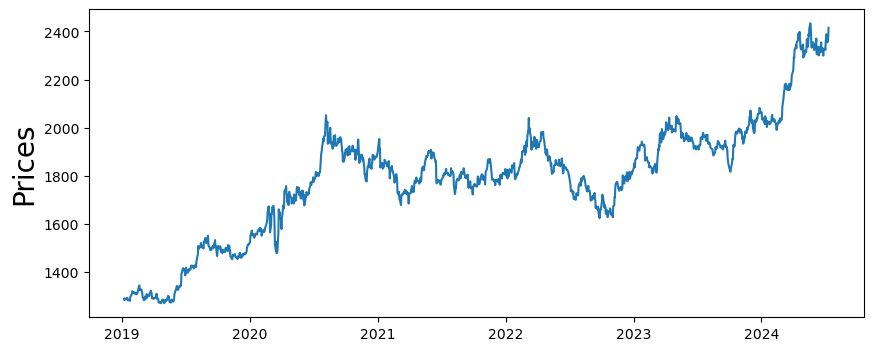

In [22]:
plt.figure(figsize=(10,4))
plt.plot(prices)
plt.ylabel('Prices', fontsize=20)

In [23]:
window_size = 5

X_data_train = prices[:'2024-01-01']
X_data_test = prices['2023-12-22':]

data_train = X_data_train.to_numpy()
data_test = X_data_test.to_numpy()

X_train = []
y_train = []
for i in range(len(data_train) - window_size - 1):
    X_train.append(data_train[i: i + window_size])
    y_temp = []
    y_temp.append(data_train[i+window_size])
    y_temp.append(data_train[i+window_size+1])
    y_train.append(y_temp)

X_test = []
y_test = []
for i in range(len(data_test) - window_size - 1):
    X_test.append(data_test[i: i + window_size])
    y_temp = []
    y_temp.append(data_test[i+window_size])
    y_temp.append(data_test[i+window_size+1])
    y_test.append(y_temp)

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [24]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [25]:
print('X_train shape = ', X_train.shape)
print('y_train shape = ', y_train.shape,'\n')

print('X_test shape = ', X_test.shape)
print('y_test shape = ', y_test.shape)

X_train shape =  (1250, 5, 1)
y_train shape =  (1250, 2) 

X_test shape =  (131, 5, 1)
y_test shape =  (131, 2)


In [26]:
model = Sequential()
model.add(SimpleRNN(128, activation='relu', return_sequences=True, input_shape=(window_size, 1)))
model.add(SimpleRNN(128, activation='relu', return_sequences=True))
model.add(SimpleRNN(64, activation='relu', return_sequences=True))
model.add(SimpleRNN(32, activation='relu'))
model.add(Dense(2))

# model = Sequential()
# model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(window_size, 1)))
# model.add(LSTM(128, activation='relu', return_sequences=True))
# model.add(LSTM(64, activation='relu', return_sequences=True))
# model.add(LSTM(32, activation='relu'))
# model.add(Dense(1))

In [27]:
# model.compile(loss='mse', optimizer='adam')
# model.fit(np.array(X_train), np.array(y_train), epochs=5000, verbose=1)

# model = Sequential()
# model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(window_size, 1)))
# model.add(LSTM(64, activation='relu', return_sequences=True))
# model.add(LSTM(32, activation='relu'))
# model.add(Dense(1))

# model = Sequential()
# model.add(SimpleRNN(64, activation='relu', return_sequences=True, input_shape=(window_size, 1)))
# model.add(SimpleRNN(64, activation='relu', return_sequences=True))
# model.add(SimpleRNN(64, activation='relu'))
# model.add(Dense(2))

model.compile(loss='mse', optimizer='adam')
model.fit(np.array(X_train), np.array(y_train), epochs=500, batch_size=32, shuffle=True, verbose=1)

Epoch 1/500
40/40 [==============================] - 2s 3ms/step - loss: 667976.1250
Epoch 2/500
40/40 [==============================] - 0s 3ms/step - loss: 3795.9373
Epoch 3/500
40/40 [==============================] - 0s 3ms/step - loss: 1191.0420
Epoch 4/500
40/40 [==============================] - 0s 3ms/step - loss: 1190.3782
Epoch 5/500
40/40 [==============================] - 0s 2ms/step - loss: 1257.1826
Epoch 6/500
40/40 [==============================] - 0s 3ms/step - loss: 1191.3427
Epoch 7/500
40/40 [==============================] - 0s 3ms/step - loss: 1398.5500
Epoch 8/500
40/40 [==============================] - 0s 2ms/step - loss: 1209.9471
Epoch 9/500
40/40 [==============================] - 0s 3ms/step - loss: 1157.1693
Epoch 10/500
40/40 [==============================] - 0s 3ms/step - loss: 1179.2458
Epoch 11/500
40/40 [==============================] - 0s 3ms/step - loss: 1146.3445
Epoch 12/500
40/40 [==============================] - 0s 3ms/step - loss: 1151.0096

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 5, 128)            16640     
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 5, 128)            32896     
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 5, 64)             12352     
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 65058 (254.13 KB)
Trainable params: 65058 (254.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
results = model.predict(np.array(X_test))

5/5 [==============================] - 0s 2ms/step


In [30]:
pred_1 = results[:,0]
pred_2 = results[:,1]

In [31]:
pred_series_1 = pd.Series(pred_1.flatten(), index=prices['2023-12-22':].index[window_size:window_size + len(pred_1)])

In [32]:
pred_series_2 = pd.Series(pred_2.flatten(), index=prices['2023-12-26':].index[window_size:window_size + len(pred_2)])

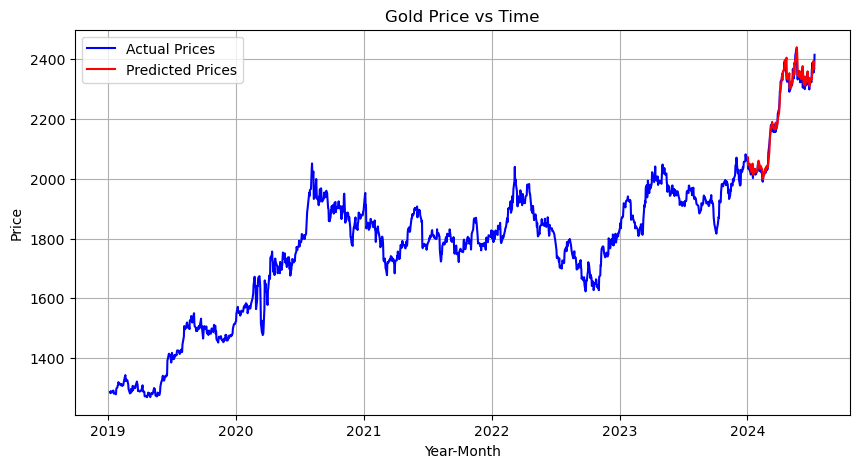

In [33]:
prices_2024 = prices['2024-01-01':]
plt.figure(figsize=(10, 5))
plt.plot(prices, color='blue', label='Actual Prices')
plt.plot(pred_series_1, color='red', label='Predicted Prices')
plt.legend()
plt.xlabel('Year-Month')
plt.ylabel('Price')
plt.title('Gold Price vs Time')
plt.grid(True)
plt.show()

In [34]:
# Calculate wrong direction prediction count and within 10% error count only if in the right direction
wrong_direction_count = 0
within_percent_count = 0
percent = 0.001

for i in range(1, len(pred_series_1)):
    if (pred_series_1[i] > pred_series_1[i - 1] and prices_2024[i] < prices_2024[i - 1]) or \
       (pred_series_1[i] < pred_series_1[i - 1] and prices_2024[i] > prices_2024[i - 1]):
        wrong_direction_count += 1
    else:
        if abs((pred_series_1[i] - prices_2024[i]) / prices_2024[i]) <= percent:
            within_percent_count += 1


wrong_direction_count_2 = 0
within_percent_count_2 = 0
percent = 0.001

for i in range(1, len(pred_series_2)):
    if (pred_series_2[i] > pred_series_2[i - 1] and prices_2024[i+1] < prices_2024[i]) or \
       (pred_series_2[i] < pred_series_2[i - 1] and prices_2024[i+1] > prices_2024[i]):
        wrong_direction_count_2 += 1
##    else:
##        if abs((pred_series_2[i] - prices_2024[i+1]) / prices_2024[i+1]) <= percent:
##            within_percent_count += 1

# Print the metrics
print(f"Right Direction Prediction Count: {len(pred_series_1) - wrong_direction_count}")
## print(f"Right Direction Prediction Count: {len(pred_series_2) - wrong_direction_count}", "-->", f"Within {percent*100}% Error Count: {within_percent_count}")
print(f"Wrong Direction Prediction Count: {wrong_direction_count}")

print('\n')
print(f"Right Direction Prediction Count: {len(pred_series_2) - wrong_direction_count_2}")
## print(f"Right Direction Prediction Count: {len(pred_series_2) - wrong_direction_count}", "-->", f"Within {percent*100}% Error Count: {within_percent_count}")
print(f"Wrong Direction Prediction Count: {wrong_direction_count_2}")

print('\n')


Right Direction Prediction Count: 62
Wrong Direction Prediction Count: 69


Right Direction Prediction Count: 69
Wrong Direction Prediction Count: 62




C:\Users\jessi\AppData\Local\Temp\ipykernel_31068\2600772712.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (pred_series_1[i] > pred_series_1[i - 1] and prices_2024[i] < prices_2024[i - 1]) or \
C:\Users\jessi\AppData\Local\Temp\ipykernel_31068\2600772712.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (pred_series_1[i] < pred_series_1[i - 1] and prices_2024[i] > prices_2024[i - 1]):
C:\Users\jessi\AppData\Local\Temp\ipykernel_31068\2600772712.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent wi

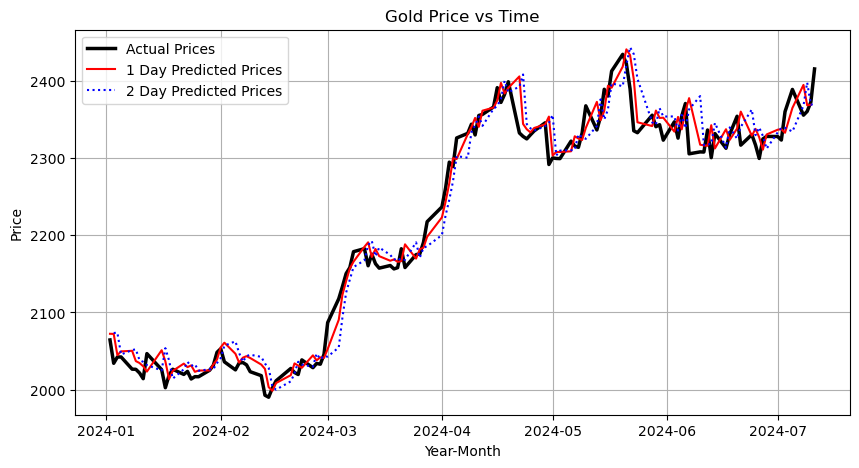

In [35]:
# Plotting the prices from 2024 onwards
plt.figure(figsize=(10, 5))
plt.plot(prices_2024, color='black', label='Actual Prices', linewidth='2.5')
plt.plot(pred_series_1, color='red', label='1 Day Predicted Prices')
plt.plot(pred_series_2, color='blue', label='2 Day Predicted Prices', linestyle='dotted')
plt.legend()
plt.xlabel('Year-Month')
plt.ylabel('Price')
plt.title('Gold Price vs Time')
plt.grid(True)
plt.show()